# **Module 6: Descriptive and Predictive Modeling**
## **Exercise 2:** A complete, non-guided Data Mining pipeline 
### **Submitted by:** Vitor Oliveira de Souza (), Jorge De La Torre García (), Lydia Phoebe Amanda Lilius (), Miguel Galán Cisneros ()
### **Date:** 26/02/2024

#### We have selected the Bank Marketing Dataset from UCI Repository
##### https://archive.ics.uci.edu/dataset/222/bank+marketing (bank.csv)
##### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

In [7]:
#Importing required packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from datetime import datetime
from sklearn.metrics import accuracy_score, f1_score, average_precision_score, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import RandomOverSampler



#### Loading the Dataset
##### Since the dataset download is a .zip with different versions, we will start with the shortest one to avoid long training processes.

In [8]:
#Loading the Dataset
data=pd.read_csv("../data/bank.csv",sep=';')

#### First data exploration and Pre-processing
##### In this section we will perform a scan of the data while processing them to check for missing values, remove outliers, convert values to numerical values, etc.

In [9]:
# Take a look in input data
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


##### We found 15 features
#### Variables description (From UCI repository)
##### age
##### job -> Occupation. Type of job
##### marital -> marital status
##### education -> Education Level
##### default -> has credit in default?
##### balance -> average yearly balance
##### housing -> has housing loan?
##### loan -> has personal loan?
##### contact -> contact communication type
##### day -> last contact day of the week
##### month -> last contact month of year
##### duration -> last contact duration, in seconds
##### campaign -> number of contacts performed during this campaign and for this client
##### pdays -> number of days that passed by after the client was last contacted from a previous campaign
##### previous -> number of contacts performed before this campaign and for this client
##### poutcome -> outcome of the previous marketing campaign
##### y -> has the client subscribed a term deposit?

In [10]:
# Analyse input data distribution
data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


##### Apparently there are no missing values, null or NaN

In [12]:
data.apply(pd.unique)

age          [30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 5...
job          [unemployed, services, management, blue-collar...
marital                            [married, single, divorced]
education              [primary, secondary, tertiary, unknown]
default                                              [no, yes]
balance      [1787, 4789, 1350, 1476, 0, 747, 307, 147, 221...
housing                                              [no, yes]
loan                                                 [no, yes]
contact                         [cellular, unknown, telephone]
day          [19, 11, 16, 3, 5, 23, 14, 6, 17, 20, 13, 30, ...
month        [oct, may, apr, jun, feb, aug, jan, jul, nov, ...
duration     [79, 220, 185, 199, 226, 141, 341, 151, 57, 31...
campaign     [1, 4, 2, 5, 3, 6, 18, 10, 9, 7, 12, 14, 13, 2...
pdays        [-1, 339, 330, 176, 147, 241, 152, 105, 342, 1...
previous     [0, 4, 1, 3, 2, 5, 20, 7, 6, 10, 9, 8, 18, 19,...
poutcome                    [unknown, failure, other, s

##### It is observed that an important part of the characteristics are categorical or binary. This is important when selecting predictive models.

Text(0.5, 1.0, 'y')

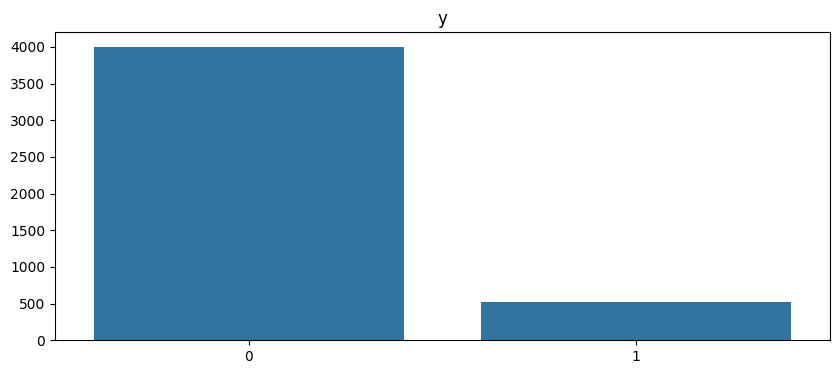

In [13]:
#The classes have been represented to check if the dataset is balanced.
plt.figure(figsize=(10,4))
sns.barplot(data['y'].value_counts().values)
plt.title('y')

##### A representation of the two classes shows that the dataset is clearly unbalanced.

##### Let's clean the outliers

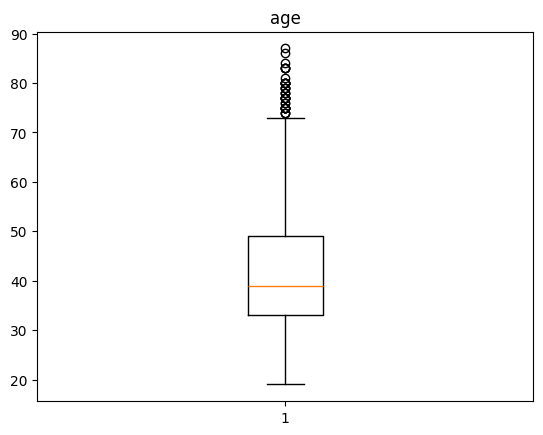

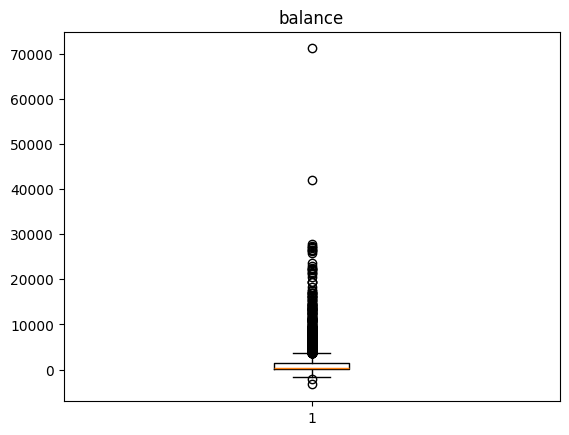

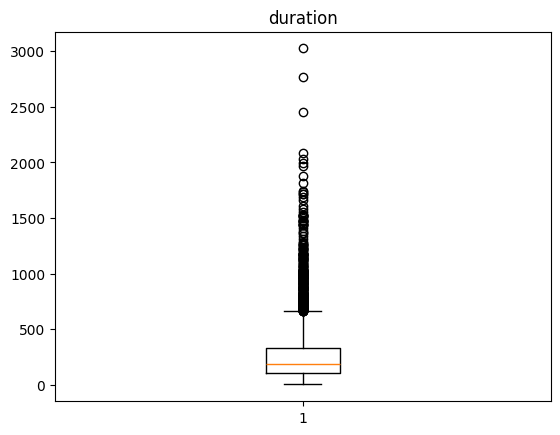

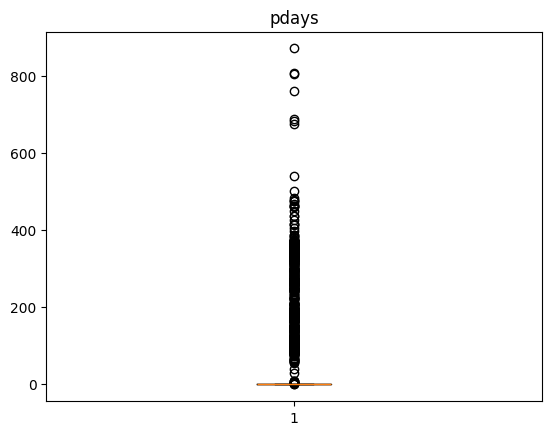

In [14]:
# Variables with possible outliers have been plotted according to the table above
col=data[['age','balance','duration','pdays']]
for column in col:
    plt.boxplot(data[column])
    plt.title(column)
    plt.show()

### Analysis:
#### pdays has a very odd distribution, let's further explore it's values by visualyzing it.

In [ ]:
pdays = data[['pdays','y']].sort_values(by='pdays', ascending=True).reset_index()
plot = plt.scatter(x=pdays.index,y=pdays['pdays'],c=pdays['y'])

In [15]:
# Let's clean the outliers using z_score
print(data.shape)
z = np.abs(stats.zscore(data[['age','balance','duration','pdays']]))
data_cleaned=data[(z<5).all(axis=1)] 
# The limit has been set at 5, due to the fact that since it is an unbalanced dataset we could eliminate relevant examples by confusing them with outlier
data_cleaned.shape

(4521, 17)


(4466, 17)

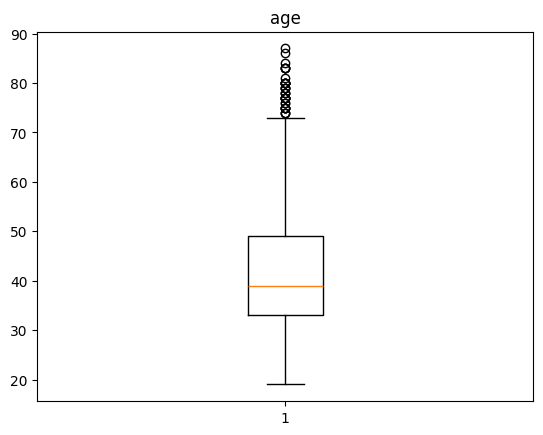

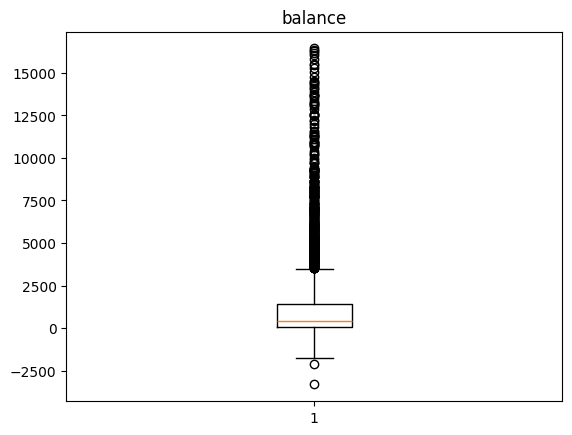

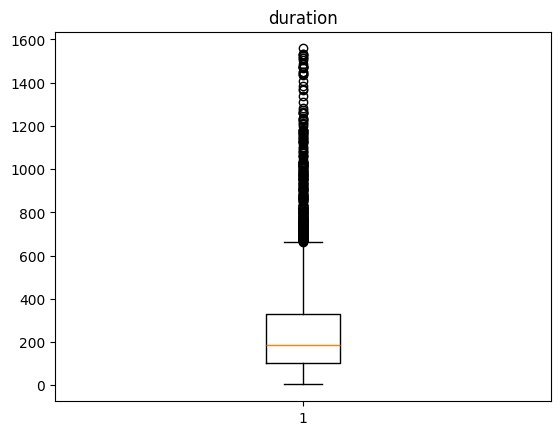

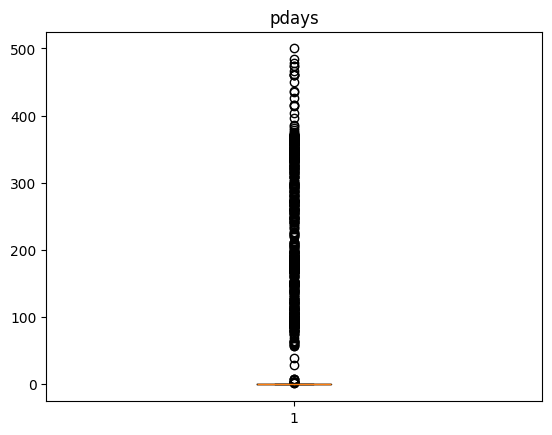

In [16]:
# The data without the outliers are plotted below
col=data_cleaned[['age','balance','duration','pdays']]
for column in col:
    plt.boxplot(data_cleaned[column])
    plt.title(column)
    plt.show()

### Transform categorical values to numeric type by hand or with LabelEncoder

In [17]:
data_cleaned = data_cleaned.copy()

data_cleaned.loc[:, ['default', 'housing', 'loan', 'y']] = data_cleaned.loc[:, ['default', 'housing', 'loan', 'y']].replace(["no", "yes"], ["0", "1"])

data_cleaned['month'] = data_cleaned['month'].replace(["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"], ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"])

le = preprocessing.LabelEncoder()

data_cleaned['job'] = le.fit_transform(data_cleaned['job'])
data_cleaned['marital'] = le.fit_transform(data_cleaned['marital'])
data_cleaned['education'] = le.fit_transform(data_cleaned['education'])
data_cleaned['contact'] = le.fit_transform(data_cleaned['contact'])
data_cleaned['poutcome'] = le.fit_transform(data_cleaned['poutcome'])

data_cleaned.head() # As a check

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,5,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,4,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,5,226,1,-1,0,3,0


### Relationship between variables
##### The variables have been plotted to show the relationship between the features and with the categories.

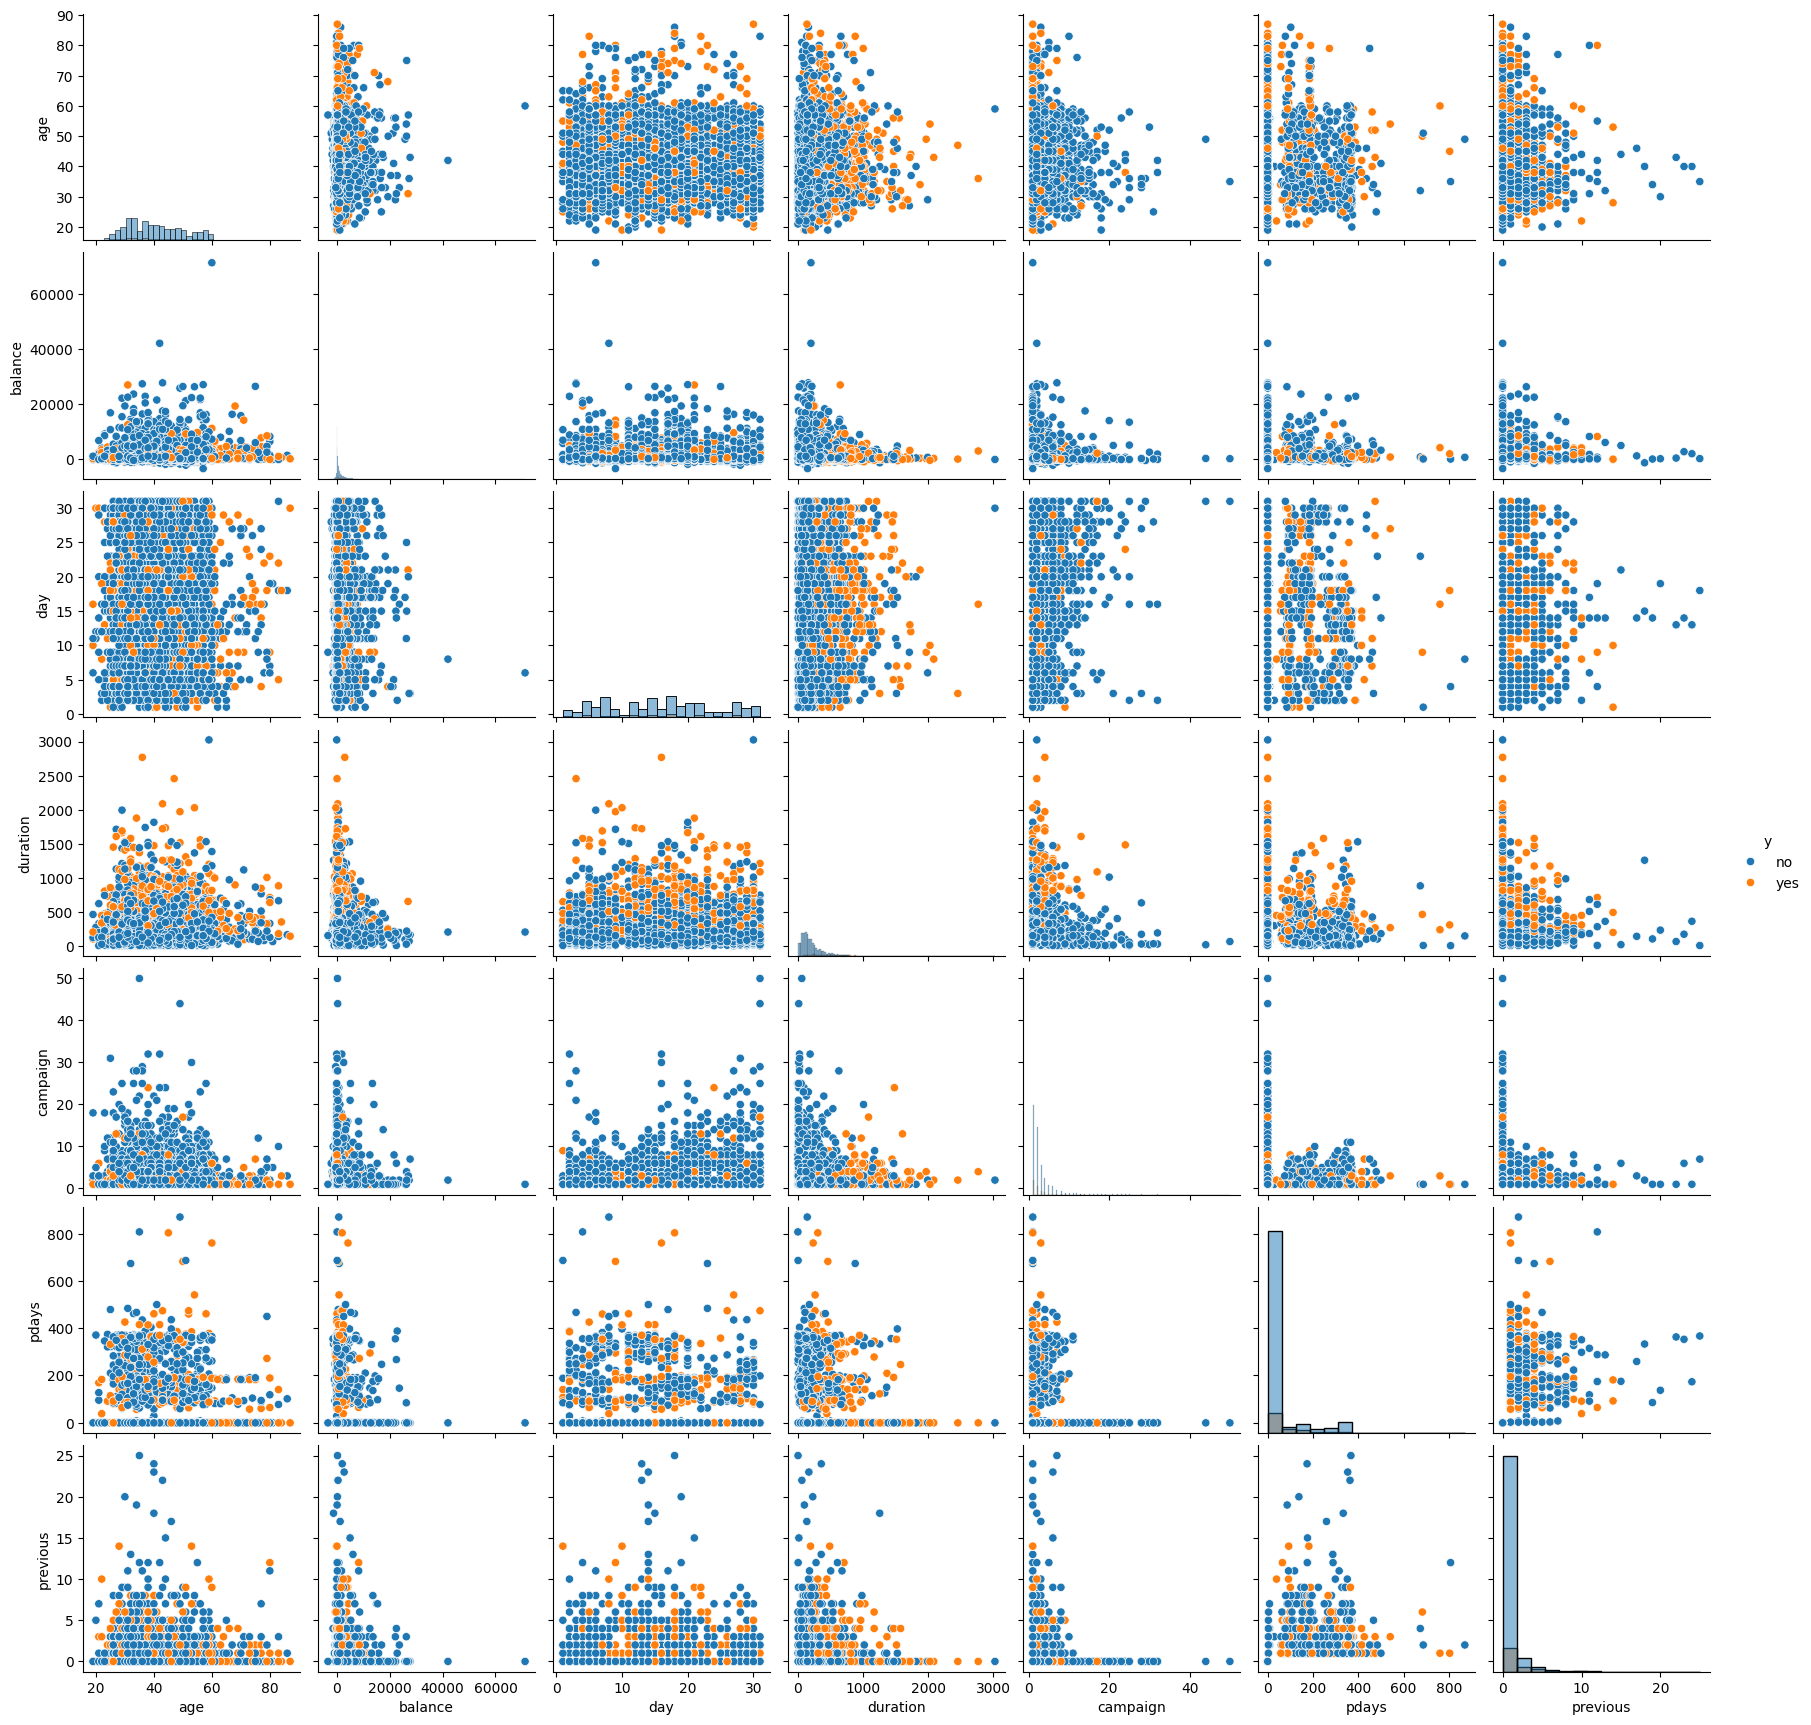

In [18]:
sns.pairplot(data, hue="y",diag_kind="hist")
plt.savefig('pairplot.png')
plt.show()

#### Let's represent the correlation matrix

<Axes: >

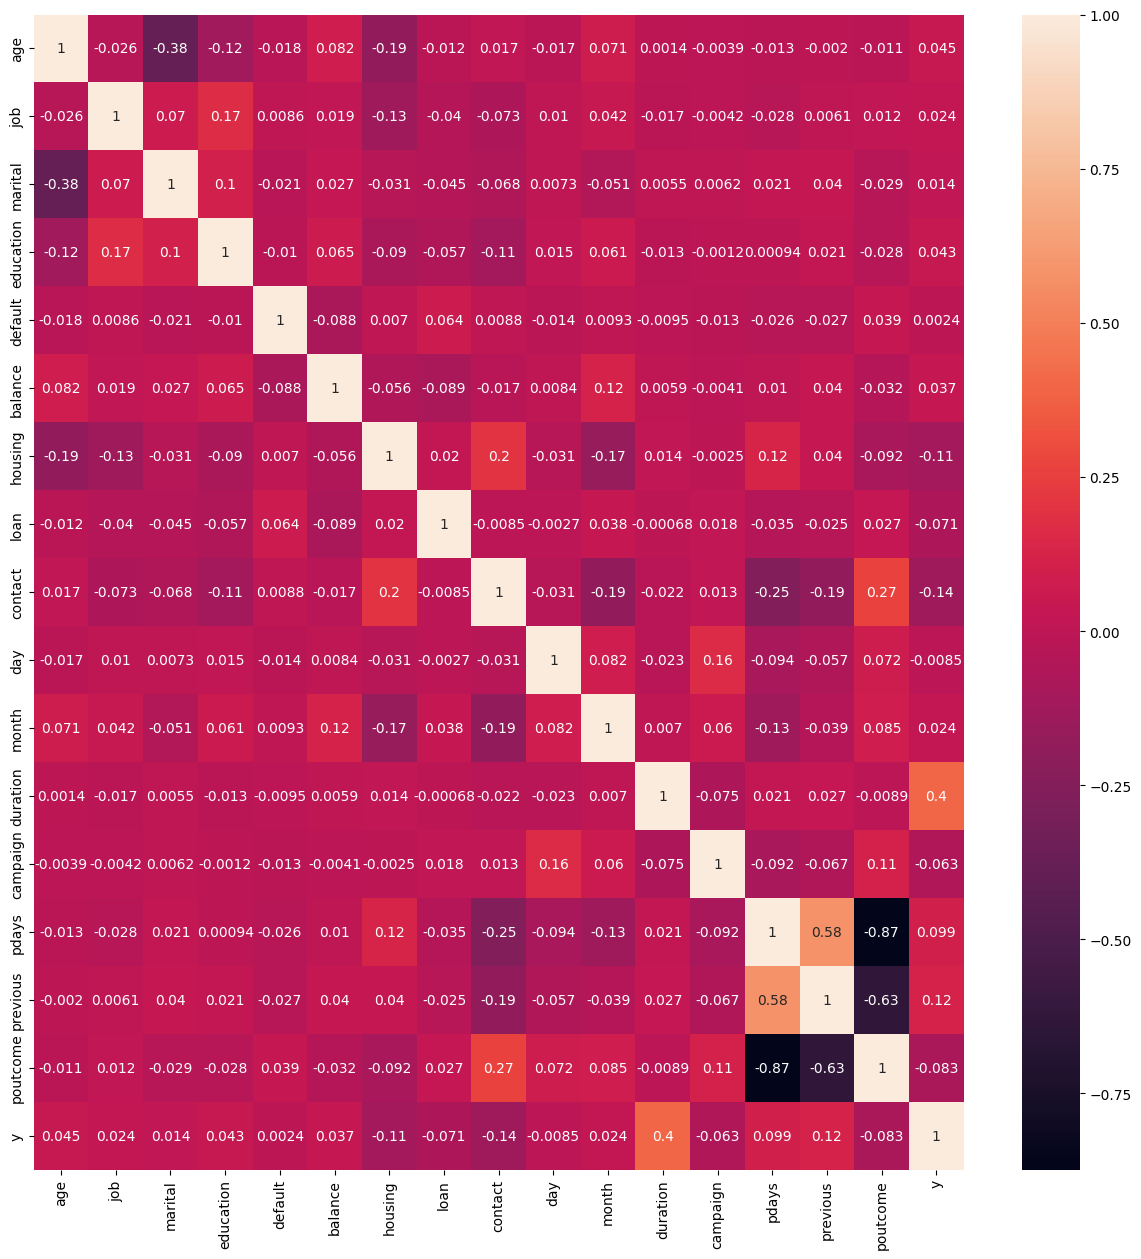

In [19]:
# Through the correlation matrix we can see the relationship of the variables
# the most important in the customer's subscription decision being the duration of the call
corr = data_cleaned.corr()
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, ax=ax, annot=True)

##### The highest correlation is between pday and previous
##### The most important in the customer's underwriting decision is call duration. This can be seen both in the correlation matrix and in the pairwise relationship graph.

### Let's separate characteristics and target variable

In [20]:
X = data_cleaned.iloc[:,0:16]
X.head() # As a check

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3
1,33,7,1,1,0,4789,1,1,0,11,5,220,1,339,4,0
2,35,4,2,2,0,1350,1,0,0,16,4,185,1,330,1,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3
4,59,1,1,1,0,0,1,0,2,5,5,226,1,-1,0,3


In [21]:
y = data_cleaned.iloc[:,16]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: object

In [22]:
# As a summary...
num_features = X.shape[1]
print("Number of features: ", num_features)

num_samples = X.shape[0]
print("Number of samples: ", num_samples)

num_categories = len(set(y))
print("Number of categories: ", num_categories)

samples_per_category = y.value_counts()

print("Number of samples per category: ", samples_per_category)

Number of features:  16
Number of samples:  4466
Number of categories:  2
Number of samples per category:  y
0    3963
1     503
Name: count, dtype: int64


#### Normalization and splitting
##### Now we create a splitter to split the data considering the classes

In [23]:
# Values scaling
miEscalador = MinMaxScaler()
miEscalador.fit(X) 
Xesc = miEscalador.transform(X)
Xesc = pd.DataFrame(Xesc)

# Now we create a splitter to split the data considering the classes
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=0)

for train_index, test_index in sss.split(Xesc, y): 
    Xtrain, ytrain = Xesc.iloc[train_index], y.iloc[train_index]
    Xtest, ytest = Xesc.iloc[test_index], y.iloc[test_index]

## Model training
#### We will test different machine learning models

### K-Nearest Neighbors model
#### KNN might be a good model for this dataset due to its ability to handle heterogeneous features, including both categorical and numerical variables, which could capture non-linear relationships in the data

In [24]:
estimator_KNN = Pipeline([('Scaler',MinMaxScaler()),('KNN',KNeighborsClassifier())])

param_grid_KNN = {'KNN__weights':['uniform','distance'],
               'KNN__metric':['cityblock','minkowski'],
               'KNN__p':[2,3,4,5,6,7],
               'KNN__n_neighbors':[3,5,7,9,11,13,15]}

cv_stratified_KNN = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

gscv_strat_KNN = GridSearchCV(
    estimator_KNN,
    param_grid_KNN,
    scoring="accuracy",
    cv=cv_stratified_KNN,
    verbose=2,
    n_jobs=-1
)
gscv_strat_KNN.fit(Xtrain,ytrain)

Fitting 10 folds for each of 168 candidates, totalling 1680 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('Scaler', MinMaxScaler()),
                                       ('KNN', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'KNN__metric': ['cityblock', 'minkowski'],
                         'KNN__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'KNN__p': [2, 3, 4, 5, 6, 7],
                         'KNN__weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

Pipeline(steps=[('Scaler', MinMaxScaler()),
                ('KNN', KNeighborsClassifier(n_neighbors=9, p=5))])
Accuracy: 	0.8915
AUC: 		0.5544
F1 score: 	0.1983

Confusion matrix values: 
 [[785   8]
 [ 89  12]]


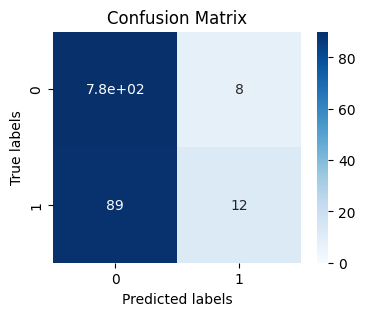

In [25]:
best_estimator_KNN = gscv_strat_KNN.best_estimator_
print (best_estimator_KNN)
ypred_KNN = best_estimator_KNN.predict(Xtest)
# Calculate and print accuracy metric
accuracy_KNN = accuracy_score(ytest, ypred_KNN)
print(f'Accuracy: \t{accuracy_KNN:.4f}')
# ROC AUC
AUC_KNN = roc_auc_score(ytest, ypred_KNN)
print(f'AUC: \t\t{AUC_KNN :.4f}')

# f1 score 
f1_KNN = f1_score(ytest, ypred_KNN, pos_label='1')
print(f'F1 score: \t{f1_KNN:.4f}')

# Confusion matrix
conf_matrix = confusion_matrix(ytest,ypred_KNN)
print('\nConfusion matrix values: \n', conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, vmax=90, vmin=0, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

##### It is observed that the accuracy is good because the database is unbalanced and hits almost all the y=0 but for the y=1 it is only able to predict a small number.
##### The ROC AUC score is worse than the previous score, but since the data is very unbalanced we will look at the f1 score. The latter value is very low

### Decision Tree
#### Considering that we have to classify and predict from mostly categorical variables, it can be a good model. Also, given the sector of the dataset, it is interesting how easy it is to understand the model if this work were to be carried out in a company.

In [26]:
estimator_tree = Pipeline([('Scaler', MinMaxScaler()), ('DecisionTree', DecisionTreeClassifier())])

param_grid_tree = {
    'DecisionTree__criterion': ['gini', 'entropy'],
    'DecisionTree__max_depth': [4, 6, 8, 10]  
}

cv_stratified = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

gscv_strat_tree = GridSearchCV(
    estimator_tree,
    param_grid_tree,
    scoring='accuracy',
    cv=cv_stratified,
    verbose=2,
    n_jobs=-1
)

gscv_strat_tree.fit(Xtrain, ytrain)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('Scaler', MinMaxScaler()),
                                       ('DecisionTree',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'DecisionTree__criterion': ['gini', 'entropy'],
                         'DecisionTree__max_depth': [4, 6, 8, 10]},
             scoring='accuracy', verbose=2)

Pipeline(steps=[('Scaler', MinMaxScaler()),
                ('DecisionTree', DecisionTreeClassifier(max_depth=6))])
Accuracy: 	0.8993
AUC: 		0.6581
F1 score: 	0.4375

Confusion matrix values: 
 [[769  24]
 [ 66  35]]


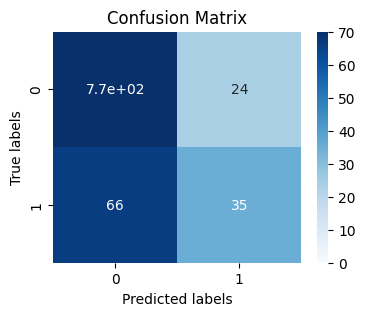

In [27]:
best_estimator_tree = gscv_strat_tree.best_estimator_
print(best_estimator_tree)

ypred_tree = best_estimator_tree.predict(Xtest)
# Calculate and print accuracy metric
accuracy_Tree = accuracy_score(ytest, ypred_tree)
print(f'Accuracy: \t{accuracy_Tree:.4f}')
# ROC AUC
AUC_Tree = roc_auc_score(ytest, ypred_tree)
print(f'AUC: \t\t{AUC_Tree:.4f}')

# f1 score 
f1_tree = f1_score(ytest, ypred_tree, pos_label='1')
print(f'F1 score: \t{f1_tree:.4f}')

# Confusion matrix
conf_matrix_tree = confusion_matrix(ytest, ypred_tree)
print('\nConfusion matrix values: \n', conf_matrix_tree)
# Visualize the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_tree, annot=True, vmax=70, vmin=0, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

##### The results obtained for the evaluation methods are better than those of the previous model, achieving correct results for a greater number of y=1.

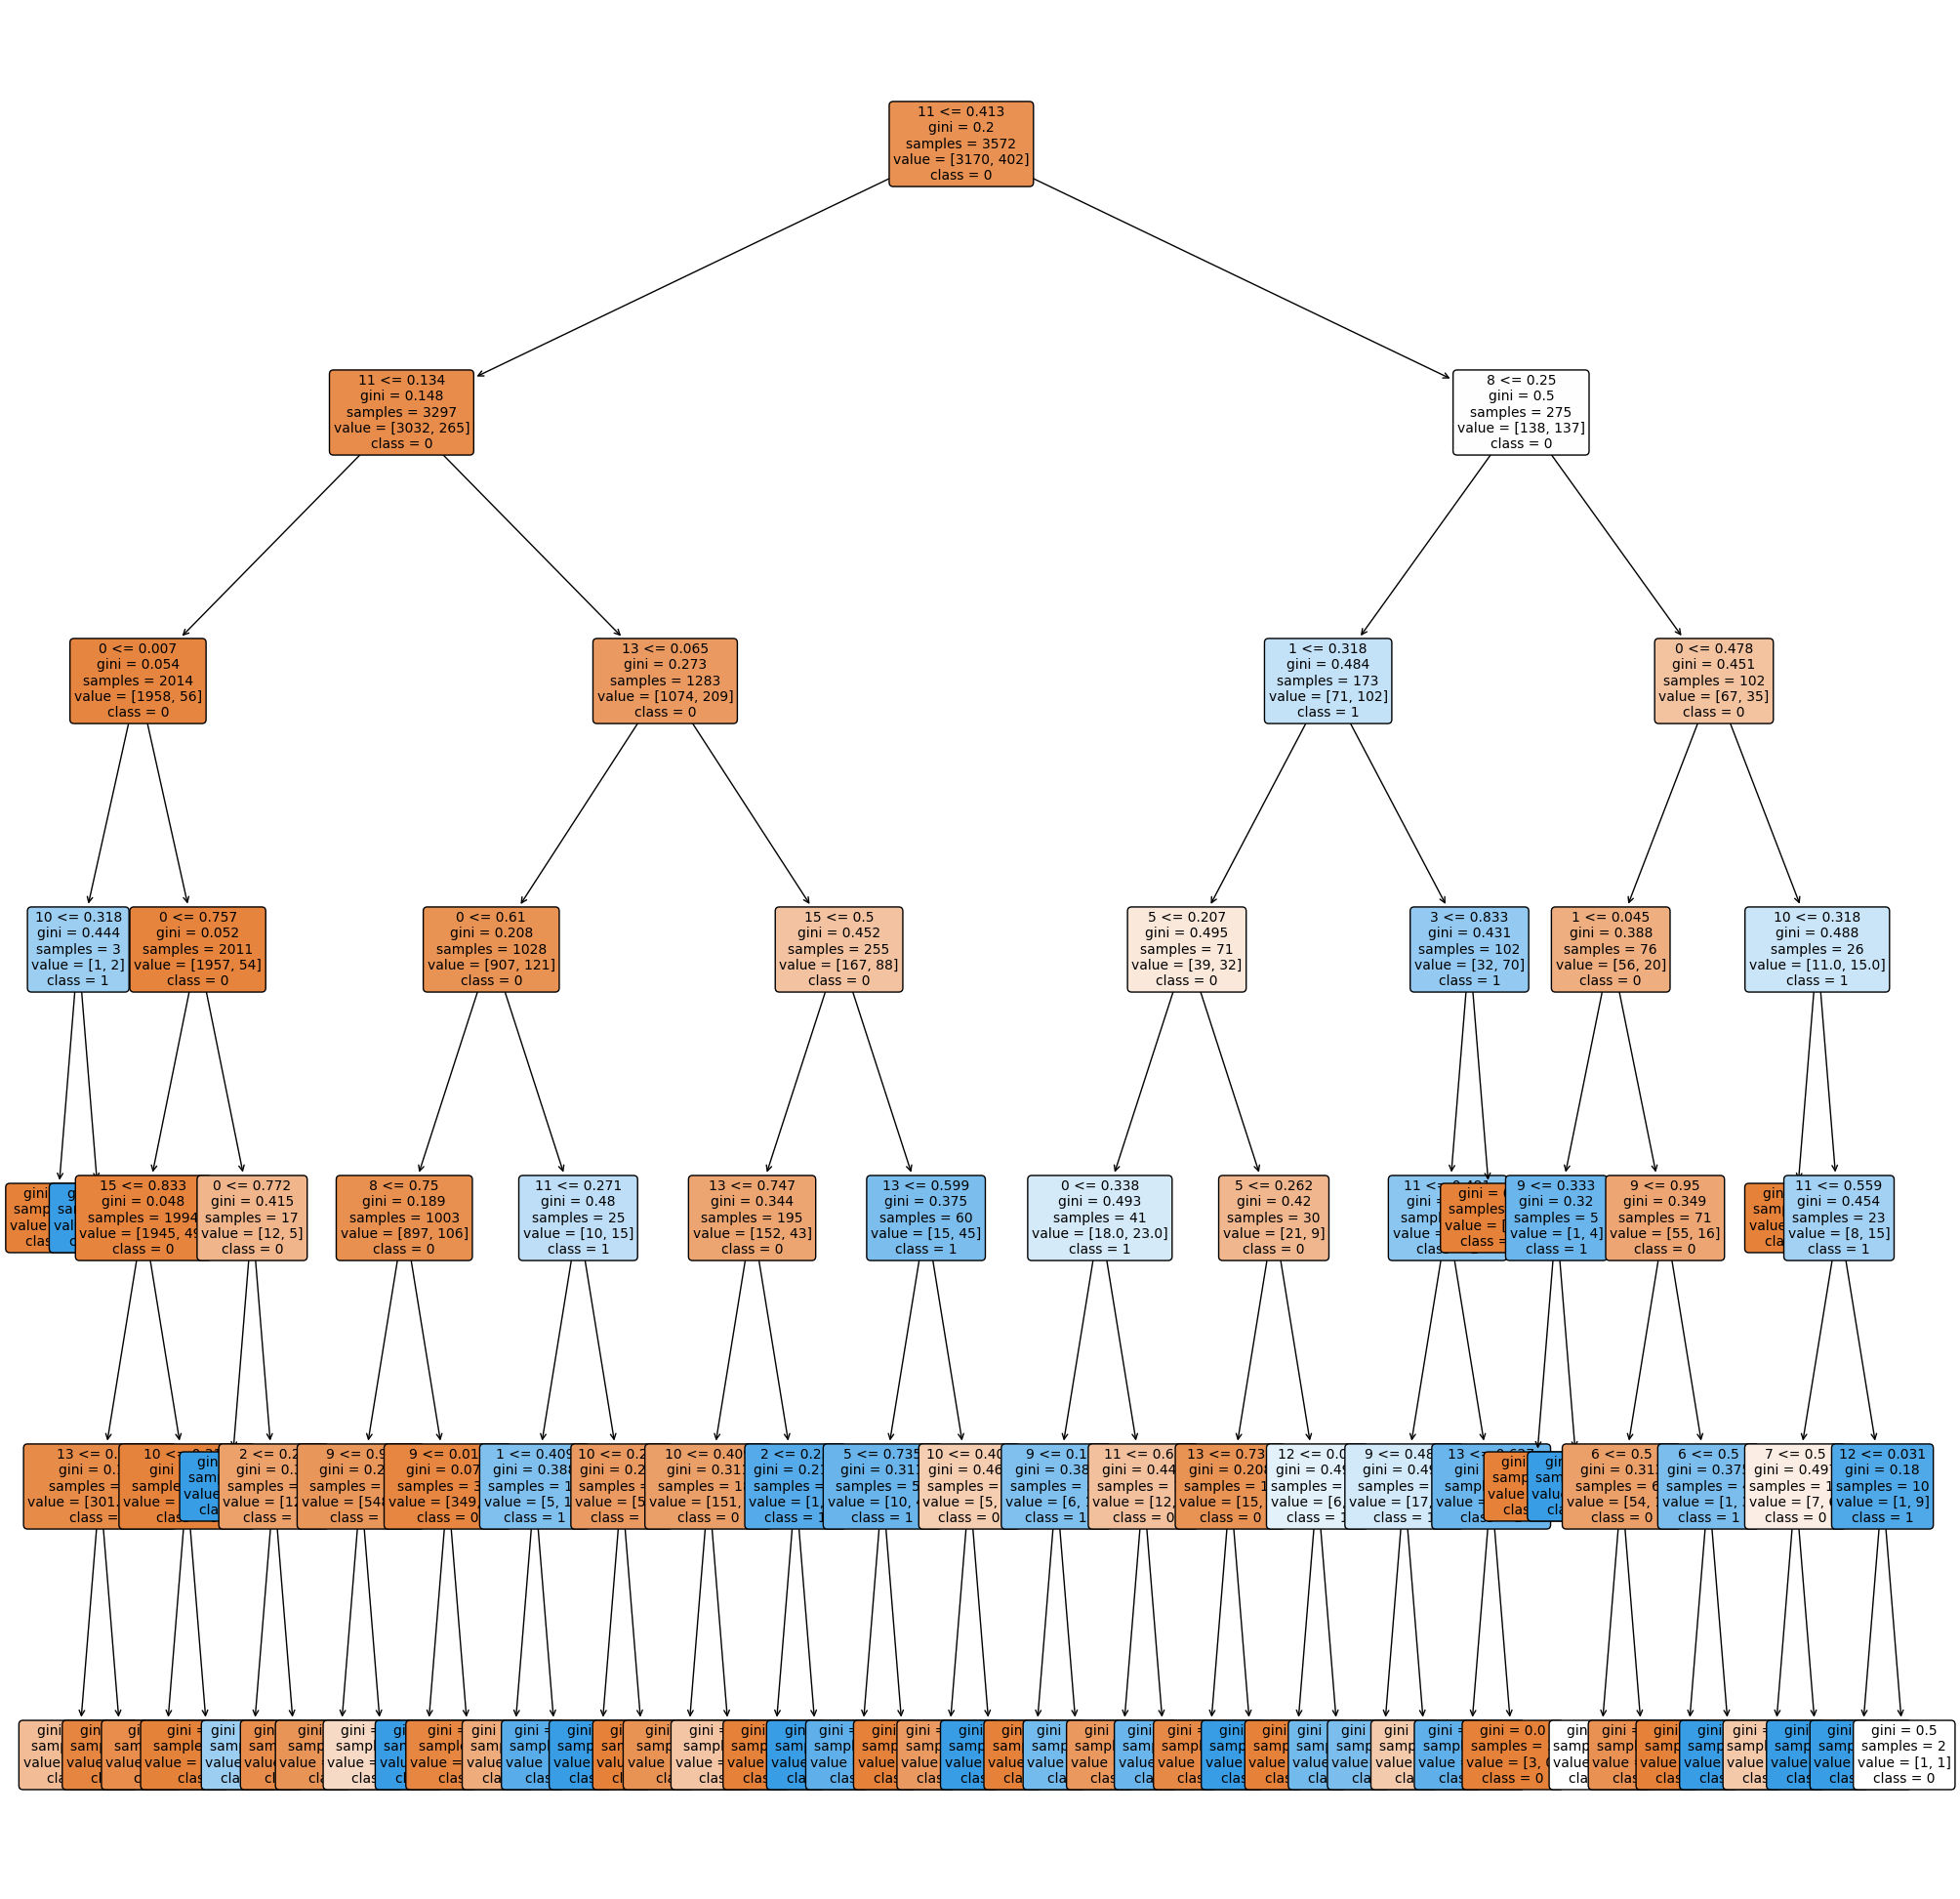

In [28]:
# Due to the fact that one of the advantages of the model is its compression, the decision tree has been represented as follows
fig = plt.figure(figsize=(25, 25))
tree.plot_tree(decision_tree=best_estimator_tree.named_steps['DecisionTree'], filled=True, rounded=True, fontsize=10, feature_names=Xtrain.columns,class_names=['0', '1'])
plt.savefig('decision_tree.png')#save the tree image in png format
plt.show()

### Random Forest
#### Given the decent performance of the Decision Tree model, Random Forest could be a suitable choice due to its ability to further improve predictive accuracy by aggregating multiple decision trees

In [29]:
estimator_RF = Pipeline([('Scaler', MinMaxScaler()), ('RandomForest', RandomForestClassifier())])

param_grid_RF = {
    'RandomForest__n_estimators': [50, 100, 200, 500],  
    'RandomForest__criterion': ['gini', 'entropy'],
    'RandomForest__min_samples_split': [2, 5, 10],
    'RandomForest__min_samples_leaf': [1, 2, 4],
}

cv_stratified = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

gscv_strat_RF = GridSearchCV(
    estimator_RF,
    param_grid_RF,
    scoring='accuracy',
    cv=cv_stratified,
    verbose=2,
    n_jobs=-1
)

gscv_strat_RF.fit(Xtrain, ytrain)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('Scaler', MinMaxScaler()),
                                       ('RandomForest',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'RandomForest__criterion': ['gini', 'entropy'],
                         'RandomForest__min_samples_leaf': [1, 2, 4],
                         'RandomForest__min_samples_split': [2, 5, 10],
                         'RandomForest__n_estimators': [50, 100, 200, 500]},
             scoring='accuracy', verbose=2)

Pipeline(steps=[('Scaler', MinMaxScaler()),
                ('RandomForest',
                 RandomForestClassifier(min_samples_leaf=2, n_estimators=50))])
Accuracy: 	0.8982
AUC: 		0.6229
F1 score: 	0.4375

Confusion matrix values: 
 [[776  17]
 [ 74  27]]


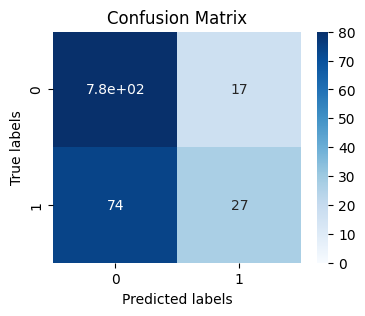

In [30]:
best_estimator_RF = gscv_strat_RF.best_estimator_
print(best_estimator_RF)

ypred_RF  = best_estimator_RF.predict(Xtest)
# Calculate and print accuracy metric
accuracy_RF = accuracy_score(ytest, ypred_RF )
print(f'Accuracy: \t{accuracy_RF:.4f}')
# ROC AUC
AUC_RF = roc_auc_score(ytest, ypred_RF )
print(f'AUC: \t\t{AUC_RF:.4f}')

# f1 score 
f1_RF  = f1_score(ytest, ypred_RF , pos_label='1')
print(f'F1 score: \t{f1_tree:.4f}')

# Confusion matrix
conf_matrix_RF = confusion_matrix(ytest, ypred_RF)
print('\nConfusion matrix values: \n', conf_matrix_RF)
# Visualize the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_RF, annot=True, vmax=80, vmin=0, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

##### Even though it is a more complex model than the decision tree, the results obtained with this model are worse than with a single decision tree.

### Boosting
#### Given that the database is very unbalanced, a boosting method can be interesting for imbalanced data because it iteratively adjusts the weights of misclassified samples, focusing more on difficult-to-classify instances, potentially improving performance on the minority class.


### AdaBoost
#### An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases. * From sklearn documentation
#### We will use this method with decision tree as a base method.

In [31]:
ada_boost = AdaBoostClassifier(algorithm="SAMME",random_state=0)

param_grid_AB = {
    'estimator': [DecisionTreeClassifier(max_depth=4)], # From the Decision Tree model results
    'n_estimators': [50, 100, 150, 200],  
    'learning_rate': [0.1, 0.5, 1.0, 2.0]  
}

gscv_strat_AB = GridSearchCV(
    ada_boost,
    param_grid_AB,
    scoring="accuracy",
    cv=gscv_strat_tree.cv,
    verbose=2,
    n_jobs=-1
)

gscv_strat_AB.fit(Xtrain, ytrain)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=AdaBoostClassifier(algorithm='SAMME', random_state=0),
             n_jobs=-1,
             param_grid={'estimator': [DecisionTreeClassifier(max_depth=4)],
                         'learning_rate': [0.1, 0.5, 1.0, 2.0],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=2)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=4),
                   learning_rate=0.5, n_estimators=150, random_state=0)
Accuracy: 	0.8982
AUC: 		0.6643
F1 score: 	0.4405

Confusion matrix values: 
 [[763  30]
 [ 64  37]]


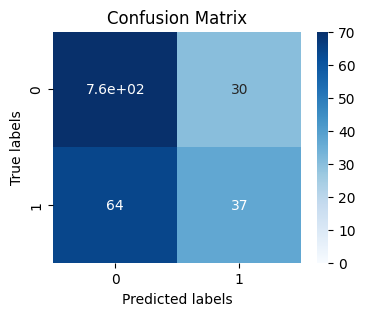

In [32]:
best_estimator_AB = gscv_strat_AB.best_estimator_
print(best_estimator_AB)

ypred_AB = best_estimator_AB.predict(Xtest)
# Calculate and print accuracy metric
accuracy_AB = accuracy_score(ytest, ypred_AB)
print(f'Accuracy: \t{accuracy_RF:.4f}')
# ROC AUC
AUC_AB = roc_auc_score(ytest, ypred_AB)
print(f'AUC: \t\t{AUC_AB:.4f}')

# f1 score 
f1_AB  = f1_score(ytest, ypred_AB , pos_label='1')
print(f'F1 score: \t{f1_AB:.4f}')

# Confusion matrix
conf_matrix_AB = confusion_matrix(ytest, ypred_AB)
print('\nConfusion matrix values: \n', conf_matrix_AB)
# Visualize the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_AB, annot=True, vmax=70, vmin=0, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

##### Although this model should fit the most difficult cases, the results are slightly worse when only the decision tree is used.

### Note
#### It seems we're not being able to capture the pattern for the least representative class due to the data unbalacing characteristic.
#### There's a few strategies we can use to deal with unbalanced data:
#### - Over-Sampling: It consists in sampling data from the minority class untill reach a equal amount of examples with the other classes. This can be usefull but we need to be carefull because it
#### - Under-Sampling:
#### - Collect more data:

### Random Over-Sampling
#### Finally, we will repeat the first three models but manually balancing the dataset by Random Over-Sampling. This method consists of adding copies of the minority class. Random Over-Sampling is extracted from Imbalanced-learn, an MIT-licensed open source library based on scikit-learn that provides tools for classifying unbalanced classes. 

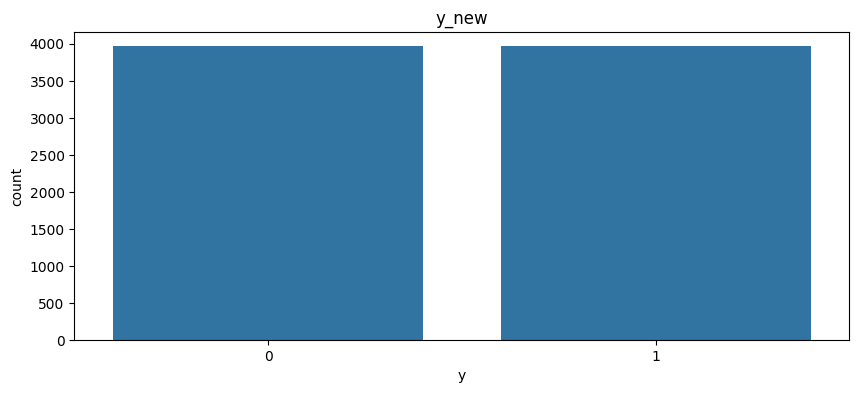

In [33]:
os =  RandomOverSampler()
X_new,y_new=os.fit_resample(X, y)

data_balanced = pd.DataFrame(X_new, columns=X.columns)
data_balanced['y'] = y_new

plt.figure(figsize=(10, 4))
sns.countplot(x='y', data=data_balanced)
plt.title('y_new')
plt.show()

#### Repeat the process of normalization and splitting with the new balanced data

In [34]:
# Values scaling
miEscalador_new = MinMaxScaler()
miEscalador_new.fit(X_new) 
Xesc_new = miEscalador_new.transform(X_new)
Xesc_new = pd.DataFrame(Xesc_new)

# Now we create a splitter to split the data considering the classes
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=0)

for train_index, test_index in sss.split(Xesc_new, y_new): 
    Xtrain_new, ytrain_new = Xesc_new.iloc[train_index], y_new.iloc[train_index]
    Xtest_new, ytest_new = Xesc_new.iloc[test_index], y_new.iloc[test_index]

### K-Nearest Neighbors model

In [35]:
gscv_strat_KNN_new = GridSearchCV(
    estimator_KNN,
    param_grid_KNN,
    scoring="accuracy",
    cv=cv_stratified,
    verbose=2,
    n_jobs=-1
)
gscv_strat_KNN_new.fit(Xtrain_new,ytrain_new)

Fitting 10 folds for each of 168 candidates, totalling 1680 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('Scaler', MinMaxScaler()),
                                       ('KNN', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'KNN__metric': ['cityblock', 'minkowski'],
                         'KNN__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'KNN__p': [2, 3, 4, 5, 6, 7],
                         'KNN__weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

Pipeline(steps=[('Scaler', MinMaxScaler()),
                ('KNN',
                 KNeighborsClassifier(metric='cityblock', n_neighbors=3,
                                      weights='distance'))])
Accuracy: 	0.9464
AUC: 		0.9464
F1 score: 	0.9491

Confusion matrix values: 
 [[708  85]
 [  0 793]]


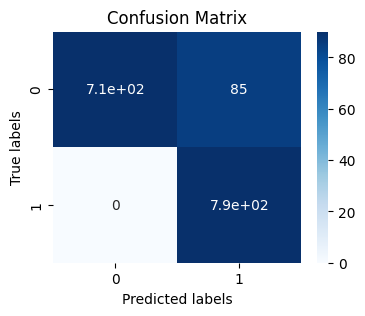

In [36]:
best_estimator_KNN_new = gscv_strat_KNN_new.best_estimator_
print (best_estimator_KNN_new)
ypred_KNN_new = best_estimator_KNN_new.predict(Xtest_new)
# Calculate and print accuracy metric
accuracy_KNN_new = accuracy_score(ytest_new, ypred_KNN_new)
print(f'Accuracy: \t{accuracy_KNN_new:.4f}')
# ROC AUC
AUC_KNN_new = roc_auc_score(ytest_new, ypred_KNN_new)
print(f'AUC: \t\t{AUC_KNN_new :.4f}')

# f1 score 
f1_KNN_new  = f1_score(ytest_new, ypred_KNN_new , pos_label='1')
print(f'F1 score: \t{f1_KNN_new:.4f}')

# Confusion matrix
conf_matrix = confusion_matrix(ytest_new,ypred_KNN_new)
print('\nConfusion matrix values: \n', conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, vmax=90, vmin=0, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree

In [37]:
gscv_strat_tree_new = GridSearchCV(
    estimator_tree,
    param_grid_tree,
    scoring='accuracy',
    cv=cv_stratified,
    verbose=2,
    n_jobs=-1
)

gscv_strat_tree_new.fit(Xtrain_new, ytrain_new)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('Scaler', MinMaxScaler()),
                                       ('DecisionTree',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'DecisionTree__criterion': ['gini', 'entropy'],
                         'DecisionTree__max_depth': [4, 6, 8, 10]},
             scoring='accuracy', verbose=2)

Pipeline(steps=[('Scaler', MinMaxScaler()),
                ('DecisionTree', DecisionTreeClassifier(max_depth=10))])
Accuracy: 	0.9117
AUC: 		0.9117
F1 score: 	0.9165

Confusion matrix values: 
 [[678 115]
 [ 25 768]]


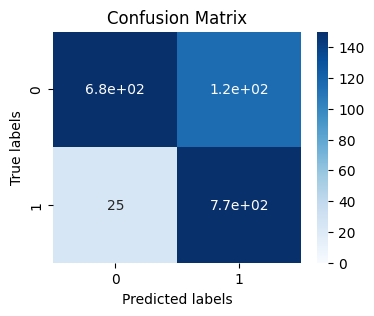

In [38]:
best_estimator_tree_new = gscv_strat_tree_new.best_estimator_
print(best_estimator_tree_new)

ypred_tree_new = best_estimator_tree_new.predict(Xtest_new)
# Calculate and print accuracy metric
accuracy_tree_new = accuracy_score(ytest_new, ypred_tree_new)
print(f'Accuracy: \t{accuracy_tree_new:.4f}')
# ROC AUC
AUC_tree_new = roc_auc_score(ytest_new, ypred_tree_new)
print(f'AUC: \t\t{AUC_tree_new:.4f}')

# f1 score 
f1_tree_new  = f1_score(ytest_new, ypred_tree_new , pos_label='1')
print(f'F1 score: \t{f1_tree_new:.4f}')

# Confusion matrix
conf_matrix_tree_new= confusion_matrix(ytest_new, ypred_tree_new)
print('\nConfusion matrix values: \n', conf_matrix_tree_new)
# Visualize the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_tree_new, annot=True, vmax=150, vmin=0, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Random Forest

In [ ]:
gscv_strat_RF_new = GridSearchCV(
    estimator_RF,
    param_grid_RF,
    scoring='accuracy',
    cv=cv_stratified,
    verbose=2,
    n_jobs=-1
)

gscv_strat_RF_new.fit(Xtrain, ytrain)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


In [ ]:
best_estimator_RF_new = gscv_strat_RF_new.best_estimator_
print(best_estimator_RF_new)

ypred_RF_new = best_estimator_RF_new.predict(Xtest_new)
# Calculate and print accuracy metric
accuracy_RF_new = accuracy_score(ytest_new, ypred_RF_new)
print(f'Accuracy: \t{accuracy_RF_new:.4f}')
# ROC AUC
AUC_RF_new = roc_auc_score(ytest_new, ypred_RF_new)
print(f'AUC: \t\t{AUC_RF_new:.4f}')

# f1 score 
f1_RF_new  = f1_score(ytest_new, ypred_RF_new , pos_label='1')
print(f'F1 score: \t{f1_RF_new:.4f}')

# Confusion matrix
conf_matrix_RF_new = confusion_matrix(ytest_new, ypred_RF_new)
print('\nConfusion matrix values: \n', conf_matrix_RF_new)
# Visualize the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_RF_new, annot=True, vmax=200, vmin=0, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Results
##### A table has been made for the scores obtained in the different cases. For a more convenient comparison of the results, the following graphs have also been plotted

In [ ]:
results = {
    'Models': ['KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'KNN_new', 'Decision Tree_new', 'Random Forest_new'],
    'Accuracy': [accuracy_KNN, accuracy_Tree, accuracy_RF, accuracy_AB, accuracy_KNN_new, accuracy_tree_new, accuracy_RF_new],
    'ROC AUC': [AUC_KNN, AUC_Tree, AUC_RF, AUC_AB, AUC_KNN_new, AUC_tree_new, AUC_RF_new],
    'f1 score': [f1_KNN, f1_tree, f1_RF, f1_AB, f1_KNN_new, f1_tree_new, f1_RF_new]
}

results = pd.DataFrame(results)

print(results)

plt.figure(figsize=(10, 6))
plt.bar(results['Models'], results['Accuracy'], color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(results['Models'], results['ROC AUC'], color='lightgreen')
plt.xlabel('Models')
plt.ylabel('ROC AUC')
plt.title('ROC AUC')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(results['Models'], results['f1 score'], color='lightseagreen')
plt.xlabel('Models')
plt.ylabel('f1 score')
plt.title('f1 score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### The results show that the first four models have a high accuracy while the f1 score, being a better method for unbalanced datasets, shows worse results due to the difficulty in predicting positive subscription results.
##### Within these four models, the decision tree is the one that achieves the highest scores. Although one would expect the following models to obtain better results as they are more complex versions of this one, the scores are slightly lower. 
##### By balancing the categories the different prediction measures are equalized. In addition, the KNN model has a very easy time increasing its scores by increasing the points with y=1 by copies